In [1]:
import cv2
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import json 
import os
import sys 
import tqdm
import torch
from learning.datatools import ApplePointCloudDataset, pad_collate_fn

/home/siddhartha/RIVAL/apple_localize/venv/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [6]:
config = {
    'voxel_size': 0.045,
    'percentile': 95
}
trainset = ApplePointCloudDataset(data_root="./blender/dataset/raw/apple_orchard-5-20-fp-only",
                                 manifest_path="./blender/dataset/curated/apple-orchard-v3-fp-only-ignore-narrow-box/train.jsonl",
                                 config=config,
                                 augment=True,
)
testset = ApplePointCloudDataset(data_root="./blender/dataset/raw/apple_orchard-5-20-fp-only",
                                manifest_path="./blender/dataset/curated/apple-orchard-v3-fp-only-ignore-narrow-box/test.jsonl",
                                config=config,
                                augment=False,
)
# from learning.datatools import pad_collate_fn
train_dl = torch.utils.data.DataLoader(trainset,
                                         batch_size=2,
                                    shuffle=True,
                                    num_workers=0,      
                                    pin_memory=True,
                                    collate_fn=pad_collate_fn,
                                    )
test_dl = torch.utils.data.DataLoader(testset,
                                        batch_size=2,
                                    shuffle=False,
                                    num_workers=0,
                                    pin_memory=True,
                                    collate_fn=pad_collate_fn,
                                    )

Loading 2635 scenes from ./blender/dataset/curated/apple-orchard-v3-fp-only-ignore-narrow-box/train.jsonl …
Loading 1522 scenes from ./blender/dataset/curated/apple-orchard-v3-fp-only-ignore-narrow-box/test.jsonl …


In [7]:
cloud_sizes = []
occ_rates =[]
bbox_sizes =[]
centers = []
stem_masks = {}

In [12]:
num_clusters = 0
for i, batch in enumerate(train_dl):
    if i > 5:
        break
    clouds, centers_batch, mask, accessories_batch = batch
    print(centers_batch)
    
    for j in range(clouds.shape[0]):
        break
        cloud = clouds[j]
        # print(centers_batch)
        
        center = centers_batch[j].cpu().numpy().flatten().tolist()
        cloud_sizes.append(cloud.shape[0])
        print(torch.min(cloud[:,2]), torch.max(cloud[:,2]))
        print("Cloud shape: ", cloud.shape)
        
        # Only plot the first item in the first 5 batches
        fig = go.Figure()
        fig.add_trace(go.Scatter3d(
                x=cloud[:, 0].numpy(),
                y=cloud[:, 1].numpy(),
                z=cloud[:, 2].numpy(),
                mode='markers',
                marker=dict(
                    size=2,
                    color=cloud[:, 3:6] 
                ),
                
        ))
        fig.add_trace(go.Scatter3d(
            x=[center[0]],
            y=[center[1]],
            z=[center[2]],
            mode='markers',
            marker=dict(
                size=5,
                color='red'
            ),
            name='Center'
        ))
        fig.update_layout(
            scene=dict(
                xaxis=dict(nticks=4, range=[-1, 1]),
                yaxis=dict(nticks=4, range=[-1, 1]),
                zaxis=dict(nticks=4, range=[-1, 1])
            ),
            width=800,
            height=800,
            margin=dict(l=0, r=0, b=0, t=0)
        )
        fig.show()
        # break

print("Average cloud size: ", np.mean(cloud_sizes))
print("Average occupancy rate: ", np.mean(occ_rates))
print("Average bbox size: ", np.mean(bbox_sizes))

tensor([[-0.0589, -0.0070,  0.0145],
        [-0.0281,  0.0048,  0.1825]])
tensor([[ 0.0119, -0.0208,  0.5607],
        [ 0.0791, -0.0849,  0.3271]])
tensor([[-0.0585, -0.0192,  0.0811],
        [-0.0388,  0.0390, -0.1069]])
tensor([[ 0.1259,  0.0063,  0.3766],
        [-0.0293, -0.0400,  0.4372]])
tensor([[-0.0521,  0.0032,  0.3755],
        [-0.1274, -0.0825,  0.4513]])
tensor([[ 0.1601, -0.0838,  0.4027],
        [-0.0749,  0.0119,  0.2503]])
Average cloud size:  nan
Average occupancy rate:  nan
Average bbox size:  nan


/home/siddhartha/RIVAL/apple_localize/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/siddhartha/RIVAL/apple_localize/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Filtered cloud shape:  torch.Size([3103, 6]) bbox size:  7056 ratio:  1.0
Filtered cloud shape:  torch.Size([3793, 6]) bbox size:  5929 ratio:  1.0
Filtered cloud shape:  torch.Size([984, 6]) bbox size:  1935 ratio:  0.9555555555555556


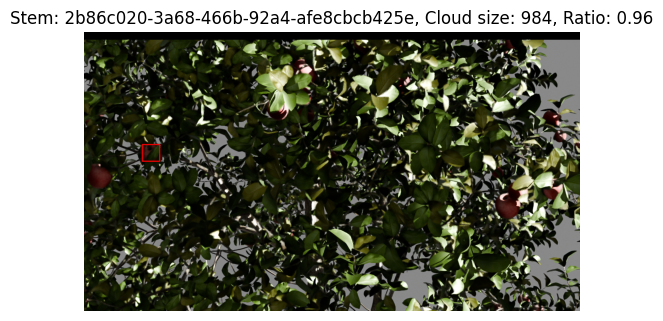

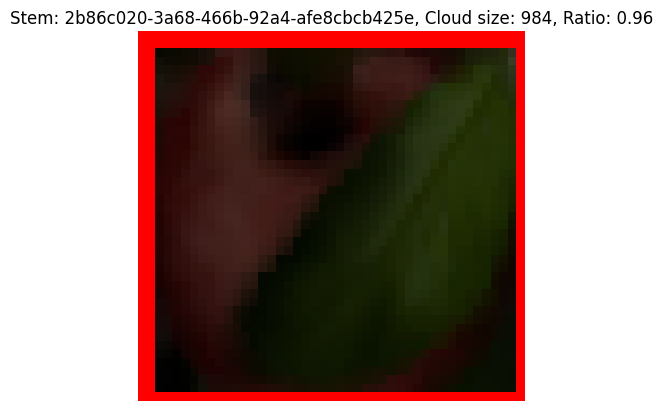

Filtered cloud shape:  torch.Size([2140, 6]) bbox size:  3969 ratio:  1.0
Filtered cloud shape:  torch.Size([4056, 6]) bbox size:  6885 ratio:  0.9529411764705882
Filtered cloud shape:  torch.Size([1531, 6]) bbox size:  5312 ratio:  0.7710843373493976


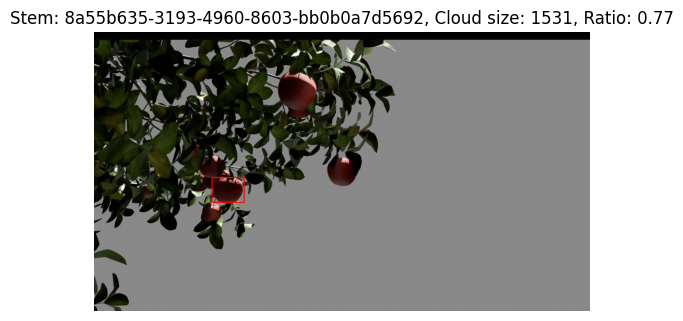

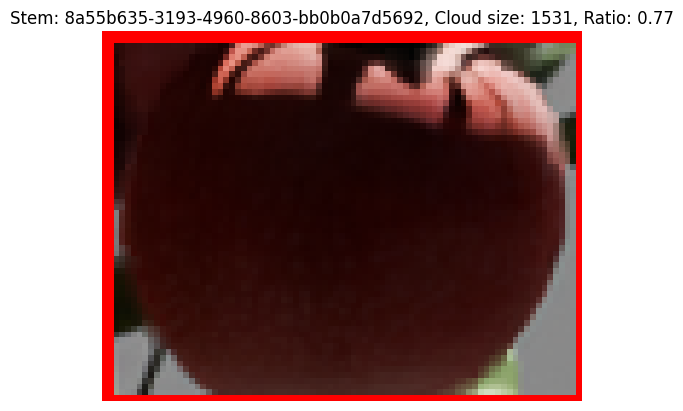

Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  17947 ratio:  0.9562043795620438
Filtered cloud shape:  torch.Size([1835, 6]) bbox size:  4599 ratio:  0.863013698630137
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11760 ratio:  0.9375
Filtered cloud shape:  torch.Size([2998, 6]) bbox size:  7950 ratio:  0.7075471698113207


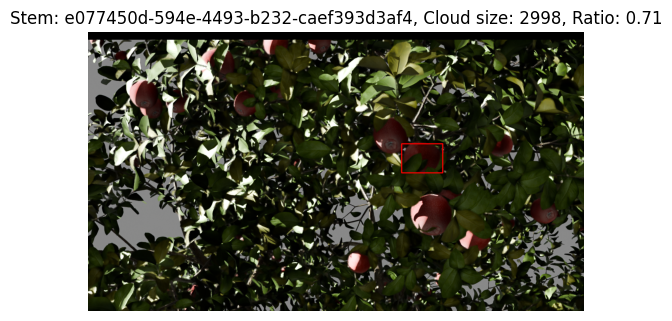

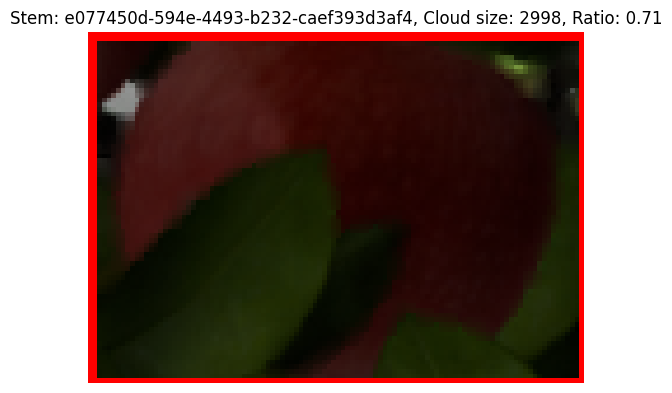

Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11730 ratio:  0.8869565217391304
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  7644 ratio:  0.9230769230769231
Filtered cloud shape:  torch.Size([3461, 6]) bbox size:  6314 ratio:  0.9390243902439024
Filtered cloud shape:  torch.Size([1735, 6]) bbox size:  2958 ratio:  0.8793103448275862
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  8924 ratio:  0.9484536082474226
Filtered cloud shape:  torch.Size([1171, 6]) bbox size:  3528 ratio:  0.8888888888888888
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11286 ratio:  0.868421052631579
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  38160 ratio:  0.6625


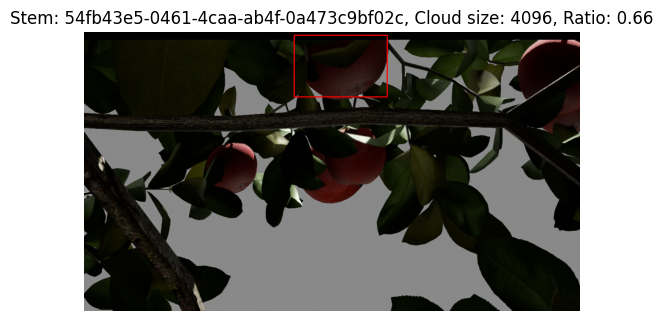

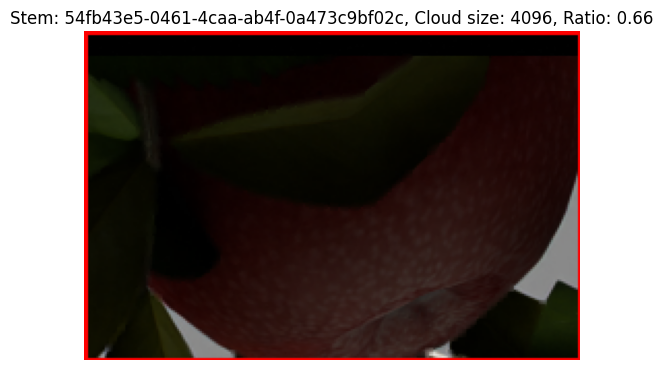

Filtered cloud shape:  torch.Size([2887, 6]) bbox size:  5175 ratio:  0.92
Filtered cloud shape:  torch.Size([1369, 6]) bbox size:  2912 ratio:  0.9285714285714286
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11211 ratio:  0.9099099099099099
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11970 ratio:  0.9210526315789473
Filtered cloud shape:  torch.Size([2585, 6]) bbox size:  5475 ratio:  0.9733333333333334
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  8700 ratio:  0.87
Filtered cloud shape:  torch.Size([836, 6]) bbox size:  2112 ratio:  0.9166666666666666


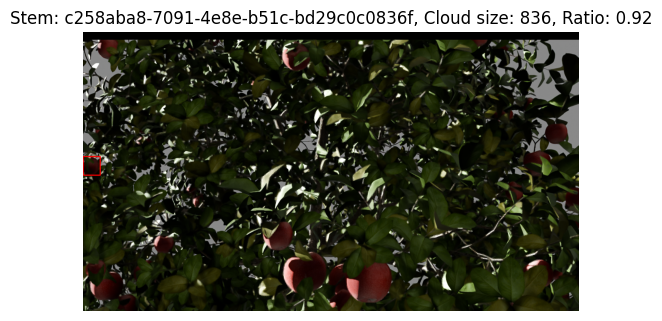

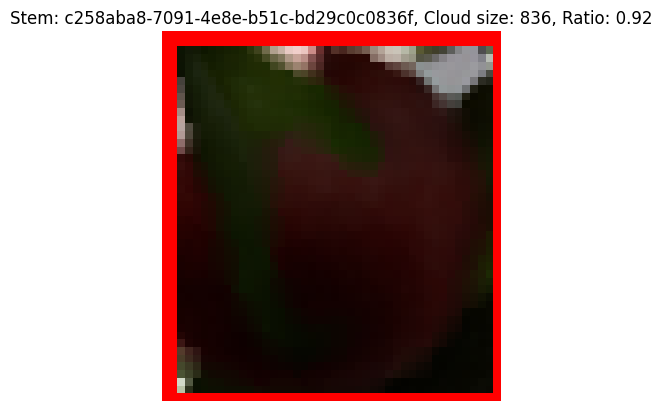

Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11845 ratio:  0.8956521739130435
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  7743 ratio:  0.9775280898876404
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  7140 ratio:  0.9882352941176471
Filtered cloud shape:  torch.Size([2171, 6]) bbox size:  6880 ratio:  0.9302325581395349
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  23400 ratio:  0.9615384615384616
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  29412 ratio:  0.9941860465116279
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  10504 ratio:  0.9711538461538461
Filtered cloud shape:  torch.Size([3400, 6]) bbox size:  10735 ratio:  0.8407079646017699
Filtered cloud shape:  torch.Size([1085, 6]) bbox size:  3720 ratio:  0.967741935483871
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  15410 ratio:  0.8582089552238806
Filtered cloud shape:  torch.Size([2972, 6]) bbox size:  5530 ratio:  0.8860759493670886
Filtered cloud s

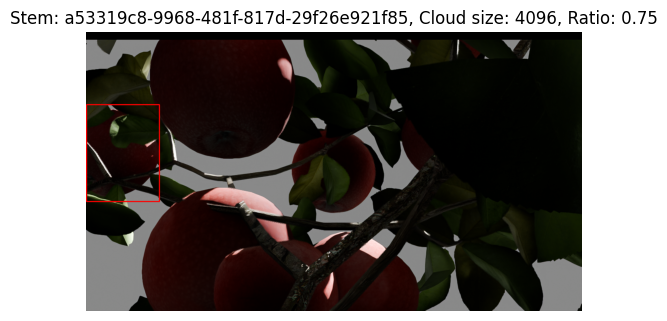

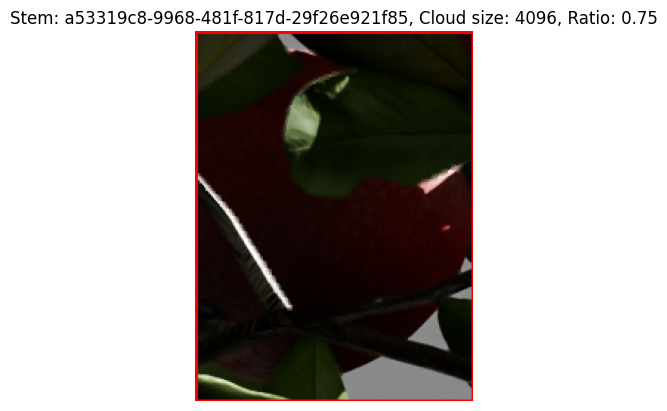

Filtered cloud shape:  torch.Size([3063, 6]) bbox size:  11024 ratio:  0.9811320754716981
Filtered cloud shape:  torch.Size([3046, 6]) bbox size:  7068 ratio:  0.8172043010752689
Filtered cloud shape:  torch.Size([3972, 6]) bbox size:  11770 ratio:  0.9727272727272728
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  42642 ratio:  0.9951690821256038
Filtered cloud shape:  torch.Size([3515, 6]) bbox size:  7387 ratio:  0.9325842696629213
Filtered cloud shape:  torch.Size([2050, 6]) bbox size:  6384 ratio:  0.9047619047619048
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  10272 ratio:  0.897196261682243
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  13970 ratio:  0.8661417322834646
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  9393 ratio:  0.9207920792079208
Filtered cloud shape:  torch.Size([3740, 6]) bbox size:  9400 ratio:  0.94
Filtered cloud shape:  torch.Size([1592, 6]) bbox size:  4745 ratio:  0.8904109589041096
Filtered cloud shape:  torch.Si

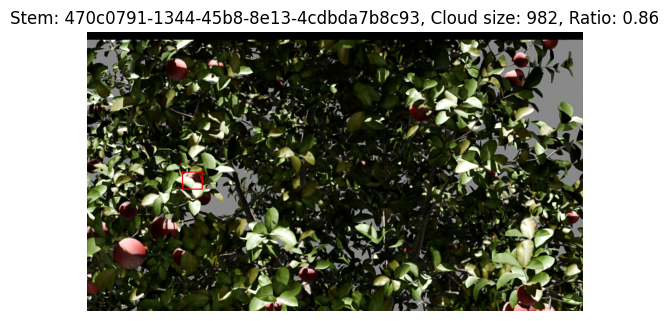

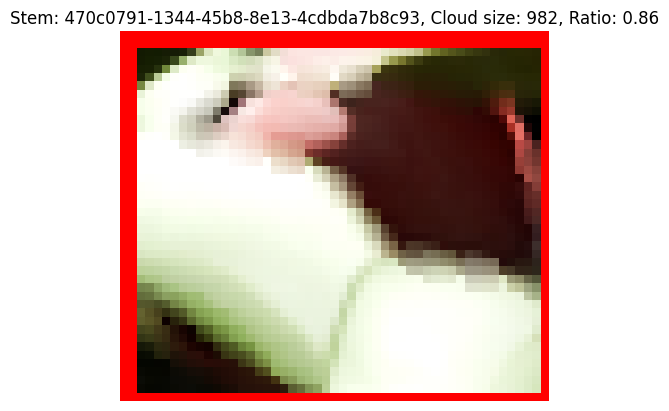

Filtered cloud shape:  torch.Size([1521, 6]) bbox size:  2585 ratio:  0.8545454545454545
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11074 ratio:  0.8672566371681416
Filtered cloud shape:  torch.Size([2141, 6]) bbox size:  5148 ratio:  0.8461538461538461
Filtered cloud shape:  torch.Size([2452, 6]) bbox size:  8170 ratio:  0.9052631578947369
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  12084 ratio:  0.9298245614035088
Filtered cloud shape:  torch.Size([3359, 6]) bbox size:  8448 ratio:  0.9166666666666666
Filtered cloud shape:  torch.Size([1817, 6]) bbox size:  5913 ratio:  0.9012345679012346
Filtered cloud shape:  torch.Size([1191, 6]) bbox size:  1748 ratio:  0.8260869565217391
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  24613 ratio:  0.9263803680981595
Filtered cloud shape:  torch.Size([3328, 6]) bbox size:  6237 ratio:  0.9506172839506173
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  17145 ratio:  0.9407407407407408
Filtered cloud sh

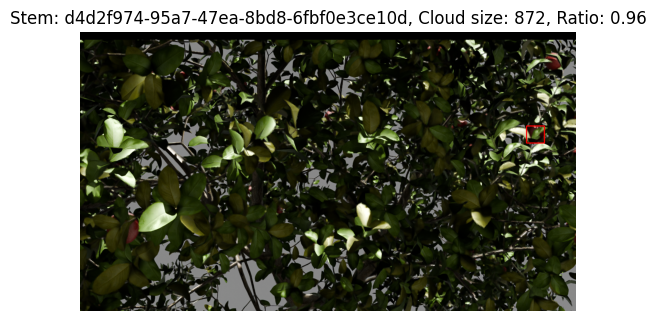

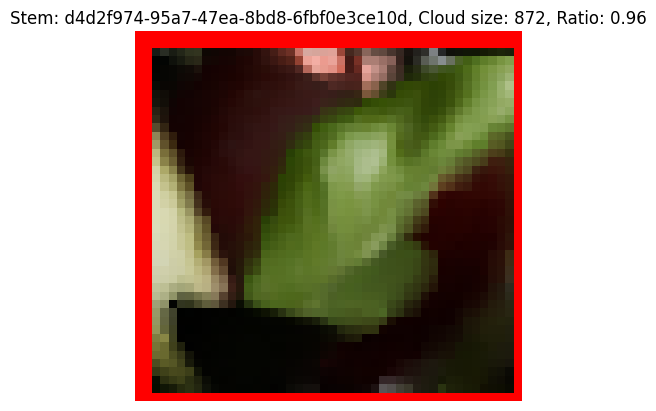

Filtered cloud shape:  torch.Size([872, 6]) bbox size:  1755 ratio:  0.8666666666666667


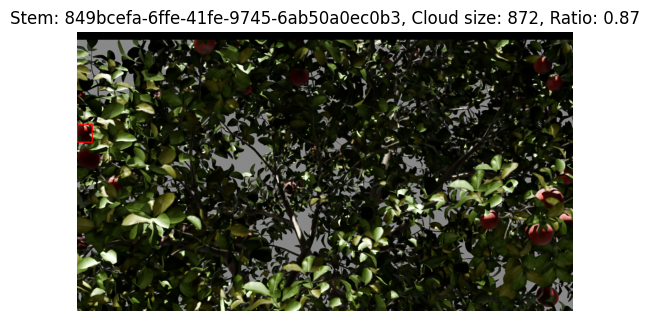

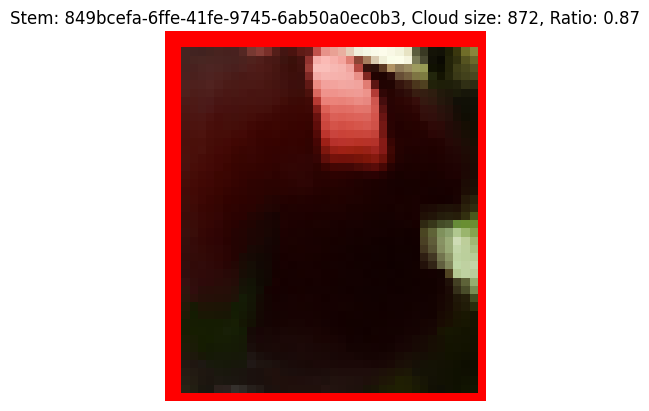

Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11227 ratio:  0.944954128440367
Filtered cloud shape:  torch.Size([3195, 6]) bbox size:  7812 ratio:  0.9032258064516129
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  12430 ratio:  0.9734513274336283
Filtered cloud shape:  torch.Size([1662, 6]) bbox size:  3618 ratio:  0.8059701492537313
Filtered cloud shape:  torch.Size([2491, 6]) bbox size:  5832 ratio:  0.8888888888888888
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  10914 ratio:  0.9532710280373832
Filtered cloud shape:  torch.Size([2289, 6]) bbox size:  4026 ratio:  0.9242424242424242
Filtered cloud shape:  torch.Size([3172, 6]) bbox size:  9191 ratio:  0.900990099009901
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11770 ratio:  0.9727272727272728
Filtered cloud shape:  torch.Size([2090, 6]) bbox size:  3900 ratio:  0.9230769230769231
Filtered cloud shape:  torch.Size([3296, 6]) bbox size:  5328 ratio:  0.972972972972973
Filtered cloud shape

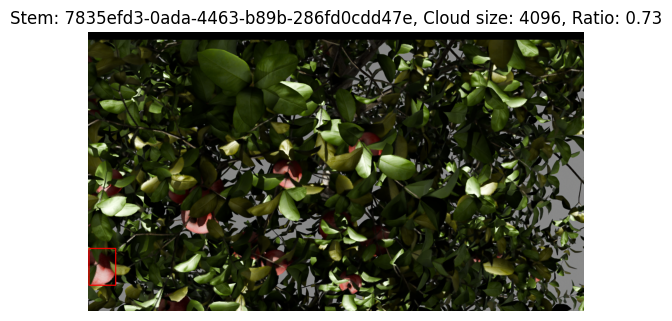

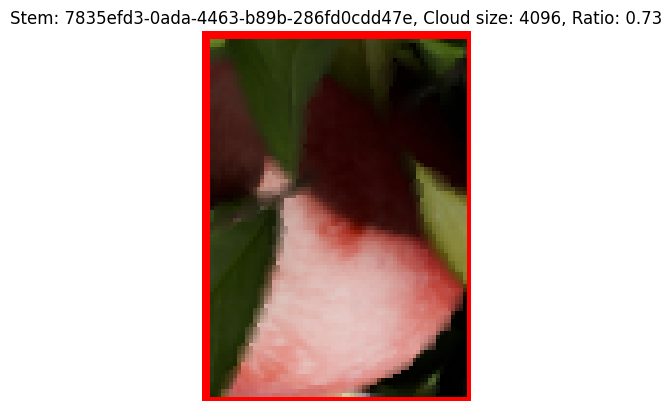

Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  11025 ratio:  1.0
Filtered cloud shape:  torch.Size([2799, 6]) bbox size:  6237 ratio:  0.9506172839506173
Filtered cloud shape:  torch.Size([3446, 6]) bbox size:  11368 ratio:  0.8448275862068966
Filtered cloud shape:  torch.Size([2227, 6]) bbox size:  5183 ratio:  0.9726027397260274
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  26296 ratio:  0.8786127167630058
Filtered cloud shape:  torch.Size([1510, 6]) bbox size:  2401 ratio:  1.0
Filtered cloud shape:  torch.Size([2055, 6]) bbox size:  3422 ratio:  0.9830508474576272
Filtered cloud shape:  torch.Size([4096, 6]) bbox size:  51230 ratio:  0.9276595744680851
Filtered cloud shape:  torch.Size([2054, 6]) bbox size:  4140 ratio:  0.8695652173913043
Filtered cloud shape:  torch.Size([3162, 6]) bbox size:  7921 ratio:  1.0
Filtered cloud shape:  torch.Size([1381, 6]) bbox size:  2208 ratio:  0.9583333333333334


In [8]:
for i, batch in enumerate(train_dl):
    if i > 64:
        break
    clouds, centers_batch, mask, accessories_batch = batch
    
    for j in range(clouds.shape[0]):
        cloud = clouds[j]
        center = centers_batch[j].cpu().numpy().flatten().tolist()
        bbox = accessories_batch['bbox'][j]
        # print("Cloud shape: ", cloud.shape)
        # remove points that are all zero
        cloud = cloud[~torch.all(cloud == 0, dim=1)]
        x1, y1, x2, y2 = bbox
        x1, x2 = min(int(x1), int(x2)), max(int(x1), int(x2))
        y1, y2 = min(int(y1), int(y2)), max(int(y1), int(y2))

        width, height = abs(x2 - x1), abs(y2 - y1)
        ratio = width/height if height > width else height/width
        bbox_size = width * height


        print("Filtered cloud shape: ", cloud.shape, "bbox size: ", bbox_size, "ratio: ", ratio)
        

        if cloud.shape[0] < 1000 or ratio <.8:
            stem = accessories_batch['stem'][j]
            rgb_path = os.path.join(trainset.root, stem + '_rgb0000.png')
            rgb = cv2.cvtColor(cv2.imread(rgb_path), cv2.COLOR_BGR2RGB)
            cv2.rectangle(rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
            plt.imshow(rgb)
            plt.title(f"Stem: {stem}, Cloud size: {cloud.shape[0]}, Ratio: {ratio:.2f}")
            plt.axis('off')
            plt.show()
            rgb_crop = rgb[y1:y2, x1:x2]
            plt.imshow(rgb_crop)
            plt.title(f"Stem: {stem}, Cloud size: {cloud.shape[0]}, Ratio: {ratio:.2f}")
            plt.axis('off')
            plt.show()

In [ ]:
man_path = '/home/siddhartha/RIVAL/learning2localize/blender/dataset/curated/apple-orchard-v1/manifest.jsonl'
# load the manifest file
with open(man_path) as f:
    scenes = [json.loads(line) for line in f]


In [ ]:
centers = []
for scene in scenes:
    centers.extend(scene['centers'])

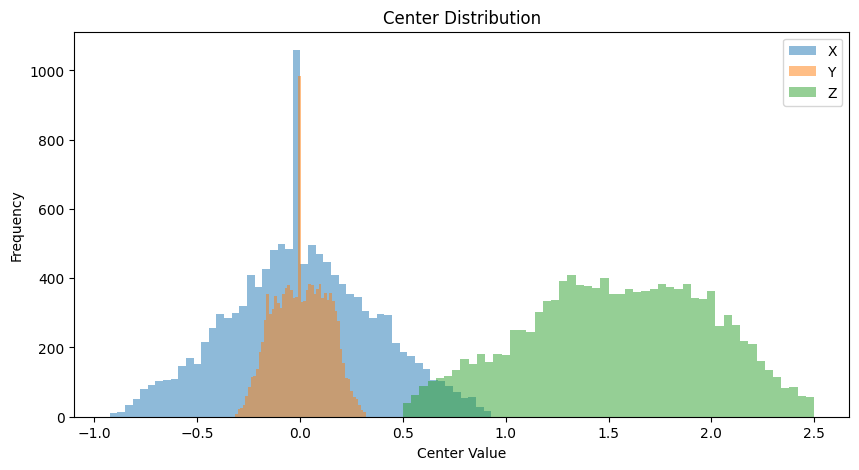

In [ ]:
# distribution of centers

x_vals = [c[0] for c in centers]
y_vals = [c[1] for c in centers]
z_vals = [abs(c[2]) for c in centers]
plt.figure(figsize=(10, 5))
#histogram of x, y, z values
plt.hist(x_vals, bins=50, alpha=0.5, label='X')
plt.hist(y_vals, bins=50, alpha=0.5, label='Y')
plt.hist(z_vals, bins=50, alpha=0.5, label='Z')
plt.title("Center Distribution")
plt.xlabel("Center Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# unnormalized centers
# x_vals = []
# y_vals = []
# z_vals = []
# for (center, scale, norm_center) in centers:
#     norm_center = np.array(norm_center).flatten()
#     scale = scale.item()
#     x_vals.append(center[0] + norm_center[0] * scale)
#     y_vals.append(center[1] + norm_center[1] * scale)
#     z_vals.append(center[2] + norm_center[2] * scale)
# plt.figure(figsize=(10, 5))
# #histogram of x, y, z values
# plt.hist(x_vals, bins=50, alpha=0.5, label='X')
# plt.hist(y_vals, bins=50, alpha=0.5, label='Y')
# plt.hist(z_vals, bins=50, alpha=0.5, label='Z')
# plt.title("Unnormalized Center Distribution")
# plt.xlabel("Unnormalized Center Value")
# plt.ylabel("Frequency")
# plt.legend()
# plt.show()


In [ ]:
num_clusters = 0
total_apples = 0
stem_boxes = {}
for scene in scenes:
    boxes = scene['boxes']
    mask = np.zeros((1080, 1920), dtype=bool)
    # print(len(boxes))
    
    for box in boxes:
        x1, y1, x2, y2 = box
        if np.any(mask[min(y1,y2):max(y1,y2), min(x1,x2):max(x1,x2)]):
            num_clusters += 1
        else:
            mask[min(y1,y2):max(y1,y2), min(x1,x2):max(x1,x2)] = True
        total_apples += 1
print(f"Number of clusters in manifest: {num_clusters}")
print(f"Total number of apples in manifest: {total_apples}")

Number of clusters in manifest: 2397
Total number of apples in manifest: 12400


In [ ]:
train_path = '/home/siddhartha/RIVAL/learning2localize/blender/dataset/curated/apple-orchard-v1/train.jsonl'
test_path = '/home/siddhartha/RIVAL/learning2localize/blender/dataset/curated/apple-orchard-v1/test.jsonl'

# load the manifest file
with open(train_path) as f:
    train_scenes = [json.loads(line) for line in f]
with open(test_path) as f:
    test_scenes = [json.loads(line) for line in f]
train_samples = sum([len(scene['boxes']) for scene in train_scenes])
test_samples = sum([len(scene['boxes']) for scene in test_scenes])
print(f"Total number of samples in train set: {train_samples}")
print(f"Total number of samples in test set: {test_samples}")


Total number of samples in train set: 9920
Total number of samples in test set: 2480
